<a href="https://colab.research.google.com/github/Messbah/Tensorflow_Practice/blob/main/Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#creating a sample data for binary classification
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)


In [22]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [23]:
import pandas as pd
circles =  pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


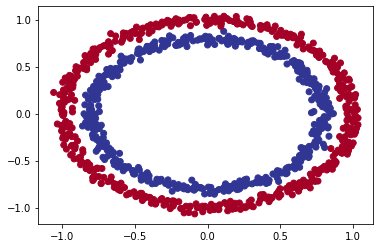

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
y= tf.constant(y)
y

In [82]:
import tensorflow as tf
tf.random.set_seed(42)
#model creation
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
#model compilation
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
#model fitting
history = model.fit(X, y, epochs=100, verbose=0)
model.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

First model has 50% accuracy which is meaningless. Let's try to improve it.

In [46]:
tf.random.set_seed(42)

new_model= tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])
new_model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])
new_history = new_model.fit(X, y, epochs=100, verbose=0)
new_model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0015085524646565318, 1.0]

Now we have got 100% accuracy.

Text(0.5, 0, 'epochs')

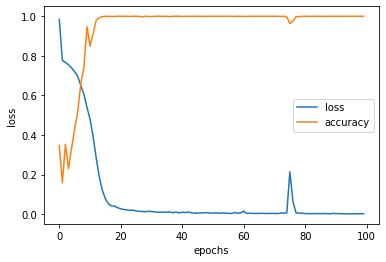

In [44]:
pd.DataFrame(new_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [47]:
new_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               300       
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [54]:
import numpy as np

In [80]:

def plot_decision(model,X,y):
  X_min,X_max = X[:,0].min() -0.1, X[:,0].max()+0.1
  y_min,y_max = X[:,0].min() -0.1, X[:,0].max()+0.1
  xx,yy = np.meshgrid(np.linspace(X_min,X_max,100),
                      np.linspace(y_min,y_max,100))
  X_in = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  # Make Predictions
  y_pred = model.predict(X_in)
  if len(y_pred[0]) > 1:
    print("Doing Multiclass Classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plotting Decision Boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

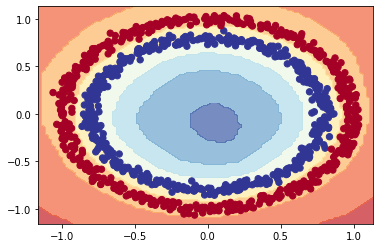

In [84]:
plot_decision(model=new_model, X=X, y=y)